# Student details

NAME : Vignesh Nagarajan

UID: 606185377

In [1]:
%cd '/content/drive/MyDrive/219/Project2'

/content/drive/MyDrive/219/Project2


In [2]:
!pip uninstall umap
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=53c92e248c550a93cbaaa82512656ba2d8d542a24d26858afd4f4fe899952fad
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039278 sha256=1ff7286131e48eab520fd0a4b87810a22fcb1c8e6cac4a3c1a3c33235125d5cb
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import warnings
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.cluster import homogeneity_score,\
                                    completeness_score,\
                                    v_measure_score,\
                                    adjusted_rand_score,\
                                    adjusted_mutual_info_score
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from tqdm import tqdm
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import itertools
import matplotlib.colors as colors
from plotmat import plot_mat
import hdbscan


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2-class

# Dataset feature extraction

In [ ]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
df = fetch_20newsgroups(subset='all', categories=categories,
shuffle=True, random_state=42)

#binary label separated , comp = 0 rec = 1
def label_gen(data):
    labels = []
    new_name = ['Computer','Recreation']

    for label in data.target:
        name = data.target_names[label]
        if name.startswith('comp'):
            labels.append(0)
        elif name.startswith('rec'):
            labels.append(1)
    return labels, new_name

label, label_name = label_gen(df)

print(np.unique(label))
print(label_name)


[0 1]
['Computer', 'Recreation']


In [ ]:
vec = CountVectorizer(min_df=3,stop_words='english')
dvec = vec.fit_transform(df.data)

tfidf = TfidfTransformer()
data_tfidf = tfidf.fit_transform(dvec)


In [ ]:
print(data_tfidf.shape)

(7882, 27768)


# ANSWER-1

The tfidf matrix shape is (7882, 27768)


# Contingency matrix K-means

In [ ]:

km = KMeans(n_clusters=2, max_iter=1500, n_init=30, random_state=42)
km.fit(data_tfidf)
print(contingency_matrix(label, km.labels_))


[[   4 3899]
 [1717 2262]]


In [ ]:
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)

    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()


# ANSWER-2

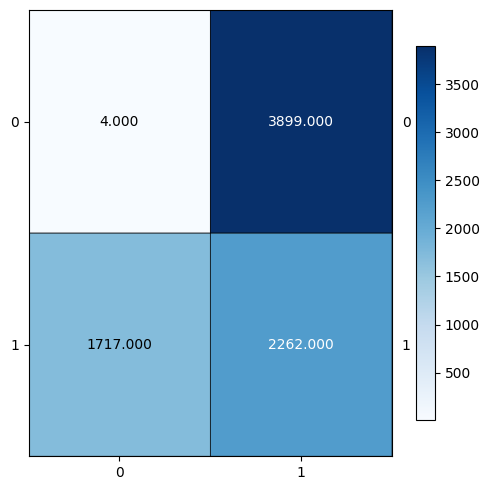

In [ ]:
plot_mat(contingency_matrix(label, km.labels_),size = (5,5))

In [ ]:
print("Homogeneity score :",
      homogeneity_score(label, km.labels_))
print("Completeness score:",
      completeness_score(label, km.labels_))
print("V-measure score :",
      v_measure_score(label, km.labels_))
print("Adjusted Rand Index score :",
      adjusted_rand_score(label, km.labels_))
print("Adjusted mutual information score :",
      adjusted_mutual_info_score(label, km.labels_))


Homogeneity score : 0.25341287993596523
Completeness score: 0.3346772445110614
V-measure score : 0.2884303641736151
Adjusted Rand Index score : 0.18054602343005735
Adjusted mutual information score : 0.2883562081995212


# Answer-3


| Metric                           | Score                           |
|----------------------------------|---------------------------------|
| Homogeneity Score                | 0.253                           |
| Completeness Score               | 0.335                           |
| V-measure Score                  | 0.288                           |
| Adjusted Rand Index Score        | 0.181                           |
| Adjusted Mutual Information Score| 0.288                           |



# Clustering with dense text representations

# Answer-4

The plots are as shown in below cells for SVD and NMF. I've also included a close-up zoomed in view for choosing best rank 'r'.

# SVD

Text(0, 0.5, 'Percent of the Variance')

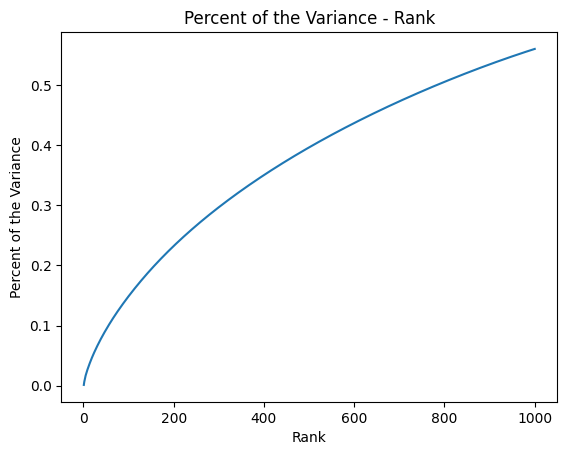

In [ ]:
r = 1000
svd = TruncatedSVD(1000)
svd.fit(data_tfidf)
ratio = svd.explained_variance_ratio_.cumsum()
x = np.array(range(1, 1001))

plt.plot(x, ratio)
plt.title('Percent of the Variance - Rank')
plt.xlabel('Rank')
plt.ylabel('Percent of the Variance')


In [ ]:
# sweep over different ranks using svd
ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
h,c,v,ar,ami = [],[],[],[],[]
for rank in ranks:
    svd = TruncatedSVD(n_components=rank)
    data_svdr = svd.fit_transform(data_tfidf)
    km.fit(data_svdr)
    h.append(homogeneity_score(label,km.labels_))
    c.append(completeness_score(label,km.labels_))
    v.append(v_measure_score(label,km.labels_))
    ar.append(adjusted_rand_score(label,km.labels_))
    ami.append(adjusted_mutual_info_score(label,km.labels_))


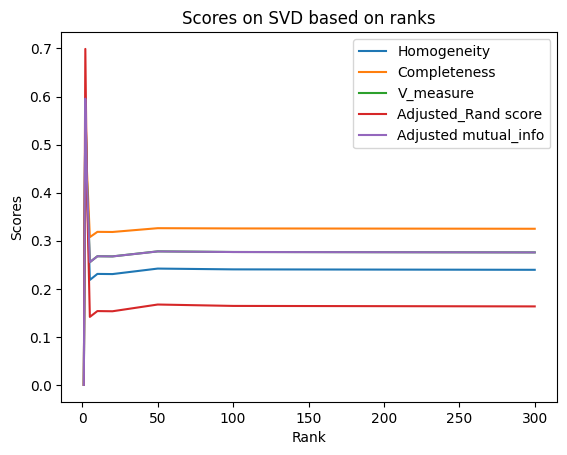

In [ ]:
plt.plot(ranks, h)
plt.plot(ranks, c)
plt.plot(ranks, v)
plt.plot(ranks, ar)
plt.plot(ranks, ami)
plt.title('Scores on SVD based on ranks')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])


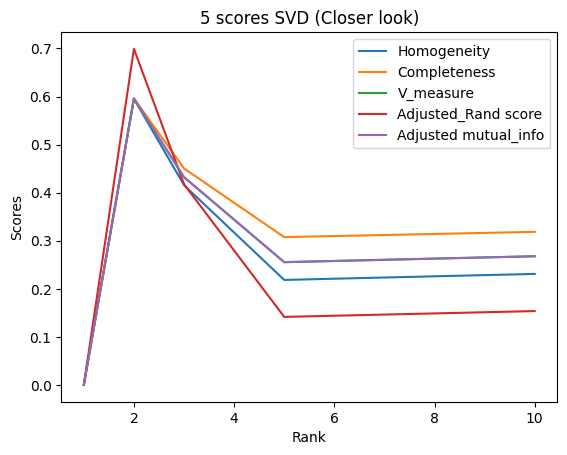

In [ ]:
plt.plot(ranks[:5], h[:5])
plt.plot(ranks[:5], c[:5])
plt.plot(ranks[:5], v[:5])
plt.plot(ranks[:5], ar[:5])
plt.plot(ranks[:5], ami[:5])
plt.title('5 scores SVD (Closer look)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])


The best rank from all the scores is clearly r=2

## NMF

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


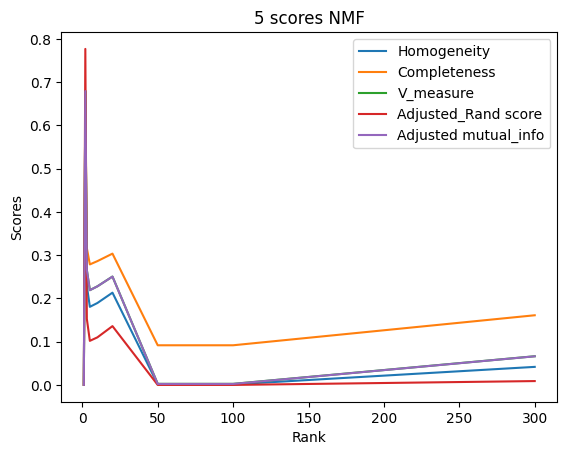

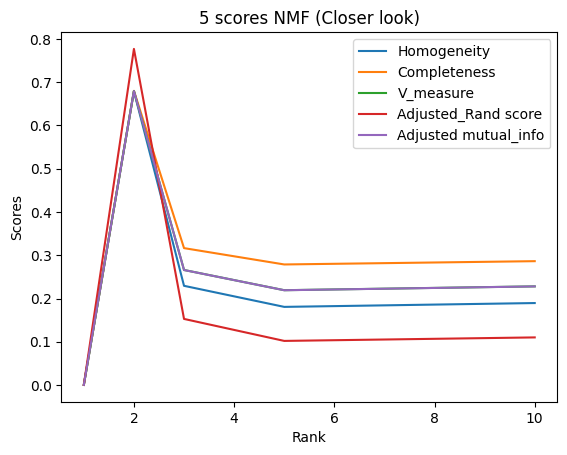

In [ ]:
# process data using nmf
from sklearn.decomposition import NMF

ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
h_nmf,c_nmf,v_nmf,ar_nmf,ami_nmf = [],[],[],[],[]
for rank in ranks:
    nmf = NMF(n_components=rank)
    data_nmf_r = nmf.fit_transform(data_tfidf)
    km.fit(data_nmf_r)
    h_nmf.append(homogeneity_score(label,km.labels_))
    c_nmf.append(completeness_score(label,km.labels_))
    v_nmf.append(v_measure_score(label,km.labels_))
    ar_nmf.append(adjusted_rand_score(label,km.labels_))
    ami_nmf.append(adjusted_mutual_info_score(label,km.labels_))

plt.plot(ranks, h_nmf)
plt.plot(ranks, c_nmf)
plt.plot(ranks, v_nmf)
plt.plot(ranks, ar_nmf)
plt.plot(ranks, ami_nmf)
plt.title('5 scores NMF')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])
plt.show()
# plot within 20
plt.plot(ranks[:5], h_nmf[:5])
plt.plot(ranks[:5], c_nmf[:5])
plt.plot(ranks[:5], v_nmf[:5])
plt.plot(ranks[:5], ar_nmf[:5])
plt.plot(ranks[:5], ami_nmf[:5])
plt.title('5 scores NMF (Closer look)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])
plt.show()

# ANSWER 5

As seen from the plots above, the best case r = 2 for both PCA and NMF.

# ANSWER 6

The reason why the non-monotonic behaviour is observed is owing to the "Curse of Dimensionality". As the number of dimensions increases, the distance between points in the high-dimensional space tends to become more uniform, and this can make it challenging for k-means to effectively cluster data in higher-dimensional spaces.



In [ ]:
print("Homogeneity score :",
      h_nmf[1])
print("Completeness score:",
      c_nmf[1])
print("V-measure score :",
      v_nmf[1])
print("Adjusted Rand Index score :",
      ar_nmf[1])
print("Adjusted mutual information score :",
      ami_nmf[1])


Homogeneity score : 0.6790483562300399
Completeness score: 0.680131609210451
V-measure score : 0.6795895510492934
Adjusted Rand Index score : 0.7770177788377391
Adjusted mutual information score : 0.6795601939855643


# ANSWER 7

Clearly, the results on average on all 5 scores are much better than those obtained for Q3. The 5 scores for r=2 are as follows:


| Metric                           | Score                           |
|----------------------------------|---------------------------------|
| Homogeneity Score                | 0.679                           |
| Completeness Score               | 0.680                           |
| V-measure Score                  | 0.680                           |
| Adjusted Rand Index Score        | 0.777                           |
| Adjusted Mutual Information Score| 0.680                           |


We see that these results are around thrice as obtained in Q3


## Visualize Clusters

# ANSWER-8

Plots are as shown below for best 'r' in SVM and NMF obtained from Answer-5

Homogeneity score : 0.595142438971607
Completeness_score score : 0.5959026162005286
V-measure score is: 0.595522284996832
Adjusted Rand Index score : 0.6981468460059148
Adjusted mutual information score : 0.5954852312955647


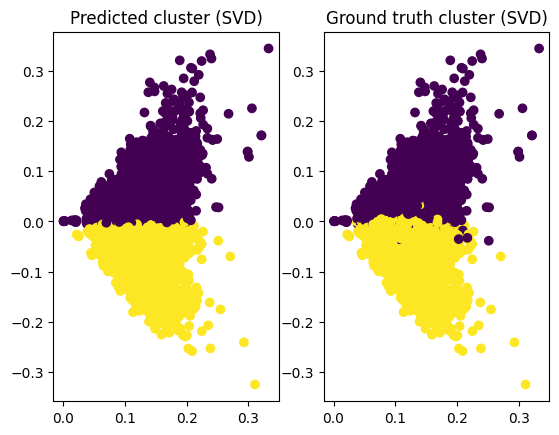

In [ ]:
svd = TruncatedSVD(n_components=2)
data_svd_2 = svd.fit_transform(data_tfidf)
nmf = NMF(n_components=2)
data_nmf_2 = nmf.fit_transform(data_tfidf)
#  svd
plt.figure(figsize=(6, 6))
km.fit(data_svd_2)

plt.subplot(121)
plt.scatter(data_svd_2[:, 0], data_svd_2[:, 1], c=km.labels_)
plt.title("Predicted cluster (SVD)")

plt.subplot(122)
plt.scatter(data_svd_2[:, 0], data_svd_2[:, 1], c=label)
plt.title("Ground truth cluster (SVD)")

print("Homogeneity score :",
      homogeneity_score(label, km.labels_))
print("Completeness_score score :",
      completeness_score(label, km.labels_))
print("V-measure score is:",
      v_measure_score(label, km.labels_))
print("Adjusted Rand Index score :",
      adjusted_rand_score(label, km.labels_))
print("Adjusted mutual information score :",
      adjusted_mutual_info_score(label, km.labels_))


Homogeneity score : 0.6790483562300399
Completeness score score : 0.680131609210451
V-measure score : 0.6795895510492934
Adjusted Rand Index score is : 0.7770177788377391
Adjusted Mutual information score is: 0.6795601939855643


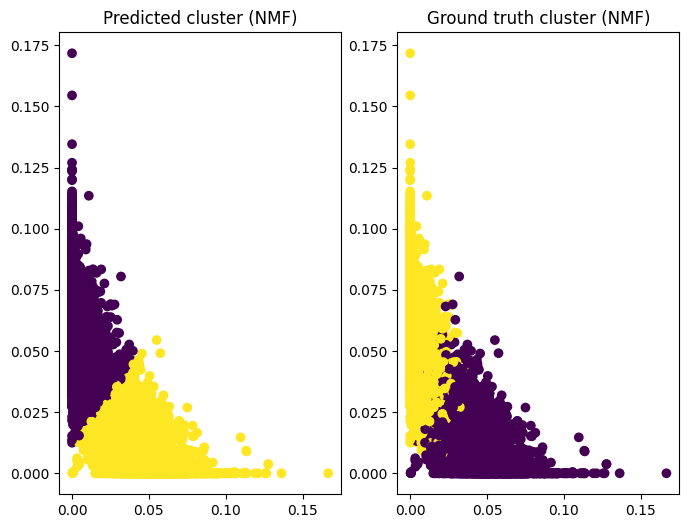

In [ ]:
km.fit(data_nmf_2)
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.scatter(data_nmf_2[:, 0], data_nmf_2[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF)")
plt.subplot(122)
plt.scatter(data_nmf_2[:, 0], data_nmf_2[:, 1], c=label)
plt.title("Ground truth cluster (NMF)")

print("Homogeneity score :",
      homogeneity_score(label, km.labels_))
print("Completeness score score :",
      completeness_score(label, km.labels_))
print("V-measure score :",
      v_measure_score(label, km.labels_))
print("Adjusted Rand Index score is :",
      adjusted_rand_score(label, km.labels_))
print("Adjusted Mutual information score is:",
      adjusted_mutual_info_score(label, km.labels_))


# ANSWER-9

We observe anisitropic nature in the data distributions when we reduce dims to r=2 in both the SVD and NMF plots.

K-means will not work well in this distribution for reasons as follows:


* K-means clustering works best when the groups it's trying
to identify are round and evenly sized. But, when we look at the SVD and NMF plots, the shapes aren't spherical; they're more like stretched-out blobs which shows that it is anisotropic gaussian and not symmetric variance in all dimensions. NMF plot even shows these blobs in different sizes.

* K-means++ is a way to start off with cluster centers far apart from one another for optimal clustering. But in the case with SVD and NMF plots, the blobs are too close together making it hard to tell them apart. That's why it's tough for K-means to group them correctly, which we can see in the low value of 5 scores for how well the clusters turn out. K-means also as we saisd assumes that each group is made up of data points that are spread out normally in all directions in a standard gaussian. But with SVD and NMF, it's clear that the spread isn't even. When the spread of points is not univariant like this, cluster centers can get thrown off by just a few noise data points.

# Clustering with 20 classes

## SVD

In [ ]:
dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 42,remove=('headers','footers'))
dvec_20 = CountVectorizer(stop_words='english',min_df=3)
tfidf_20 = TfidfTransformer()
data_dvec_20 = dvec_20.fit_transform(dataset.data)
tfidf_20 = tfidf_20.fit_transform(data_dvec_20)


In [ ]:
h_s_svd = []
c_s_svd = []
v_s_svd = []
ar_s_svd = []
ami_s_svd = []

km_20 = KMeans(n_clusters=20, init='k-means++', max_iter=1500, n_init=30, random_state=42)
ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for rank in ranks:
    print("r=",rank)
    svd = TruncatedSVD(n_components=rank, random_state=42)
    svd_transformed_data = svd.fit_transform(tfidf_20)
    kmeans_svd = km_20.fit(svd_transformed_data)
    h_s_svd.append(homogeneity_score(dataset.target, kmeans_svd.labels_))
    c_s_svd.append(completeness_score(dataset.target, kmeans_svd.labels_))
    v_s_svd.append(v_measure_score(dataset.target, kmeans_svd.labels_))
    ar_s_svd.append(adjusted_rand_score(dataset.target, kmeans_svd.labels_))
    ami_s_svd.append(adjusted_mutual_info_score(dataset.target, kmeans_svd.labels_))


r= 1
r= 2
r= 3
r= 5
r= 10
r= 20
r= 50
r= 100
r= 300


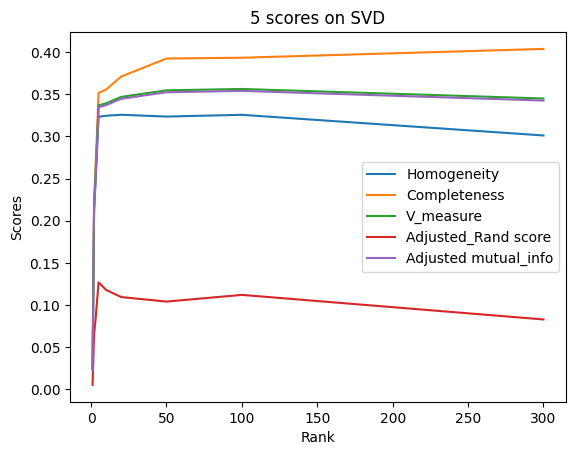

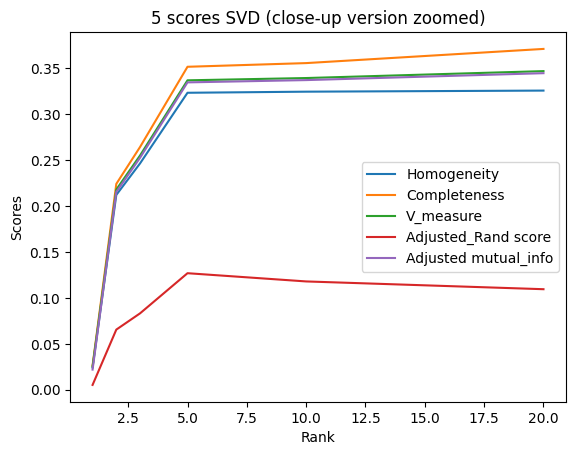

In [ ]:
# plot 5 scores to find the best rank


plt.plot(ranks, h_s_svd)
plt.plot(ranks, c_s_svd)
plt.plot(ranks, v_s_svd)
plt.plot(ranks, ar_s_svd)
plt.plot(ranks, ami_s_svd)
plt.title('5 scores on SVD')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])
plt.show()
plt.plot(ranks[:6], h_s_svd[:6])
plt.plot(ranks[:6], c_s_svd[:6])
plt.plot(ranks[:6], v_s_svd[:6])
plt.plot(ranks[:6], ar_s_svd[:6])
plt.plot(ranks[:6], ami_s_svd[:6])
plt.title('5 scores SVD (close-up version zoomed)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])
plt.show()

Best r = 5 for SVD

## NMF

In [ ]:
h_s_nmf,c_s_nmf,v_s_nmf,ar_s_nmf,ami_s_nmf = [],[],[],[],[]
for rank in ranks:
    print("r=" , rank)
    nmf = NMF(n_components=rank)
    nmf_20 = nmf.fit_transform(tfidf_20)
    km_20.fit(nmf_20)
    h_s_nmf.append(homogeneity_score(dataset.target,km_20.labels_))
    c_s_nmf.append(completeness_score(dataset.target,km_20.labels_))
    v_s_nmf.append(v_measure_score(dataset.target,km_20.labels_))
    ar_s_nmf.append(adjusted_rand_score(dataset.target,km_20.labels_))
    ami_s_nmf.append(adjusted_mutual_info_score(dataset.target,km_20.labels_))


r= 1
r= 2
r= 3
r= 5
r= 10
r= 20
r= 50
r= 100
r= 300


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


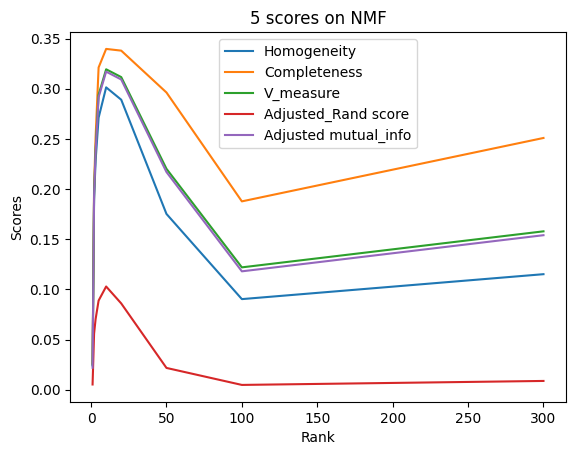

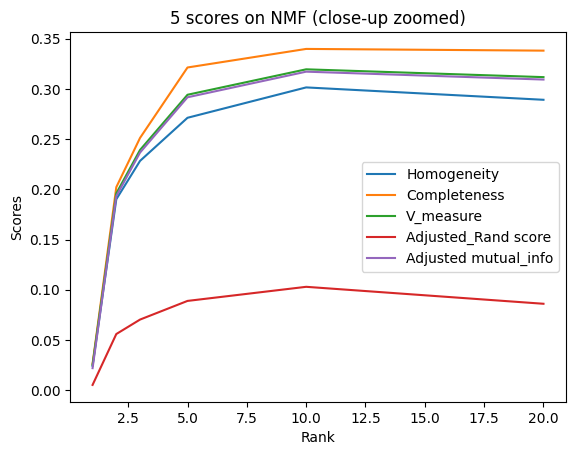

In [ ]:
# plot 5 scores to find the best rank
plt.plot(ranks, h_s_nmf)
plt.plot(ranks, c_s_nmf)
plt.plot(ranks, v_s_nmf)
plt.plot(ranks, ar_s_nmf)
plt.plot(ranks, ami_s_nmf)
plt.title('5 scores on NMF')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])
plt.show()
# close-up plot
plt.plot(ranks[:6], h_s_nmf[:6])
plt.plot(ranks[:6], c_s_nmf[:6])
plt.plot(ranks[:6], v_s_nmf[:6])
plt.plot(ranks[:6], ar_s_nmf[:6])
plt.plot(ranks[:6], ami_s_nmf[:6])
plt.title('5 scores on NMF (close-up zoomed)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['Homogeneity','Completeness',
                     'V_measure','Adjusted_Rand score','Adjusted mutual_info'])
plt.show()

Best r = 10 for NMF

## Truncate data for SVD and NMF

### SVD

In [ ]:
r_svd, r_nmf = 5,10
svd_5 = TruncatedSVD(n_components=r_svd)
nmf_10 = NMF(n_components=r_nmf)
svd_5_ac = svd_5.fit_transform(tfidf_20)
nmf_10_ac = nmf_10.fit_transform(tfidf_20)


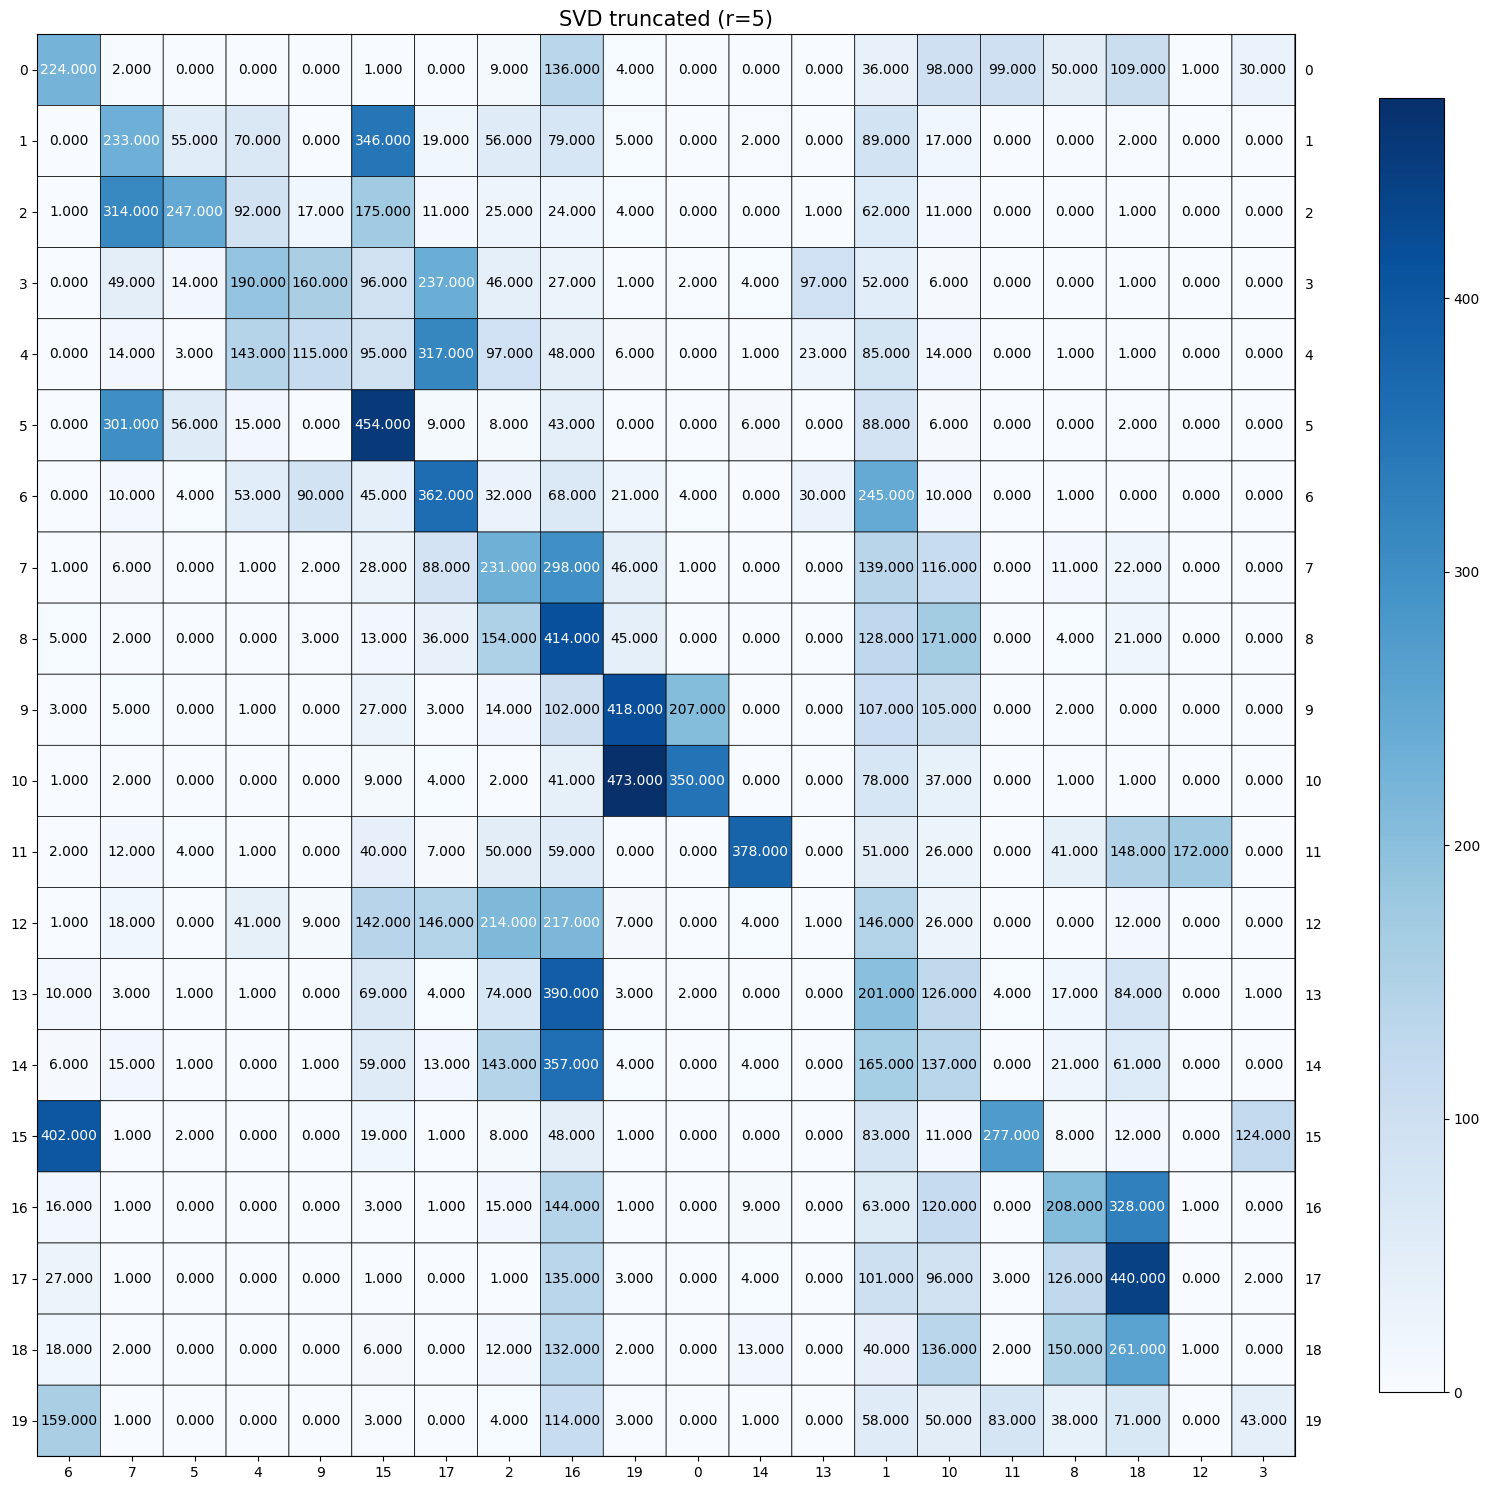

In [ ]:
from plotmat import plot_mat
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
km_20_svd = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=42)

km_svd_all_r__5 = km_20_svd.fit(svd_5_ac)
cm_svd = confusion_matrix(dataset.target, km_svd_all_r__5.labels_)
rows, cols = linear_sum_assignment(cm_svd, maximize=True)
plot_mat(cm_svd[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15),title = "SVD truncated (r=5)")

In [ ]:
print("############# SVD Truncated Scores #####################")
print("Homogeneity score :",
      homogeneity_score(dataset.target, km_svd_all_r__5.labels_))
print("Completeness score score :",
      completeness_score(dataset.target, km_svd_all_r__5.labels_))
print("V-measure score :",
      v_measure_score(dataset.target, km_svd_all_r__5.labels_))
print("Adjusted Rand Index score is :",
      adjusted_rand_score(dataset.target, km_svd_all_r__5.labels_))
print("Adjusted Mutual information score is:",
      adjusted_mutual_info_score(dataset.target, km_svd_all_r__5.labels_))


############# SVD Truncated Scores #####################
Homogeneity score : 0.3234034902259969
Completeness score score : 0.35162912368425425
V-measure score : 0.33692619740508106
Adjusted Rand Index score is : 0.12688298800519768
Adjusted Mutual information score is: 0.3346883593503683


### NMF

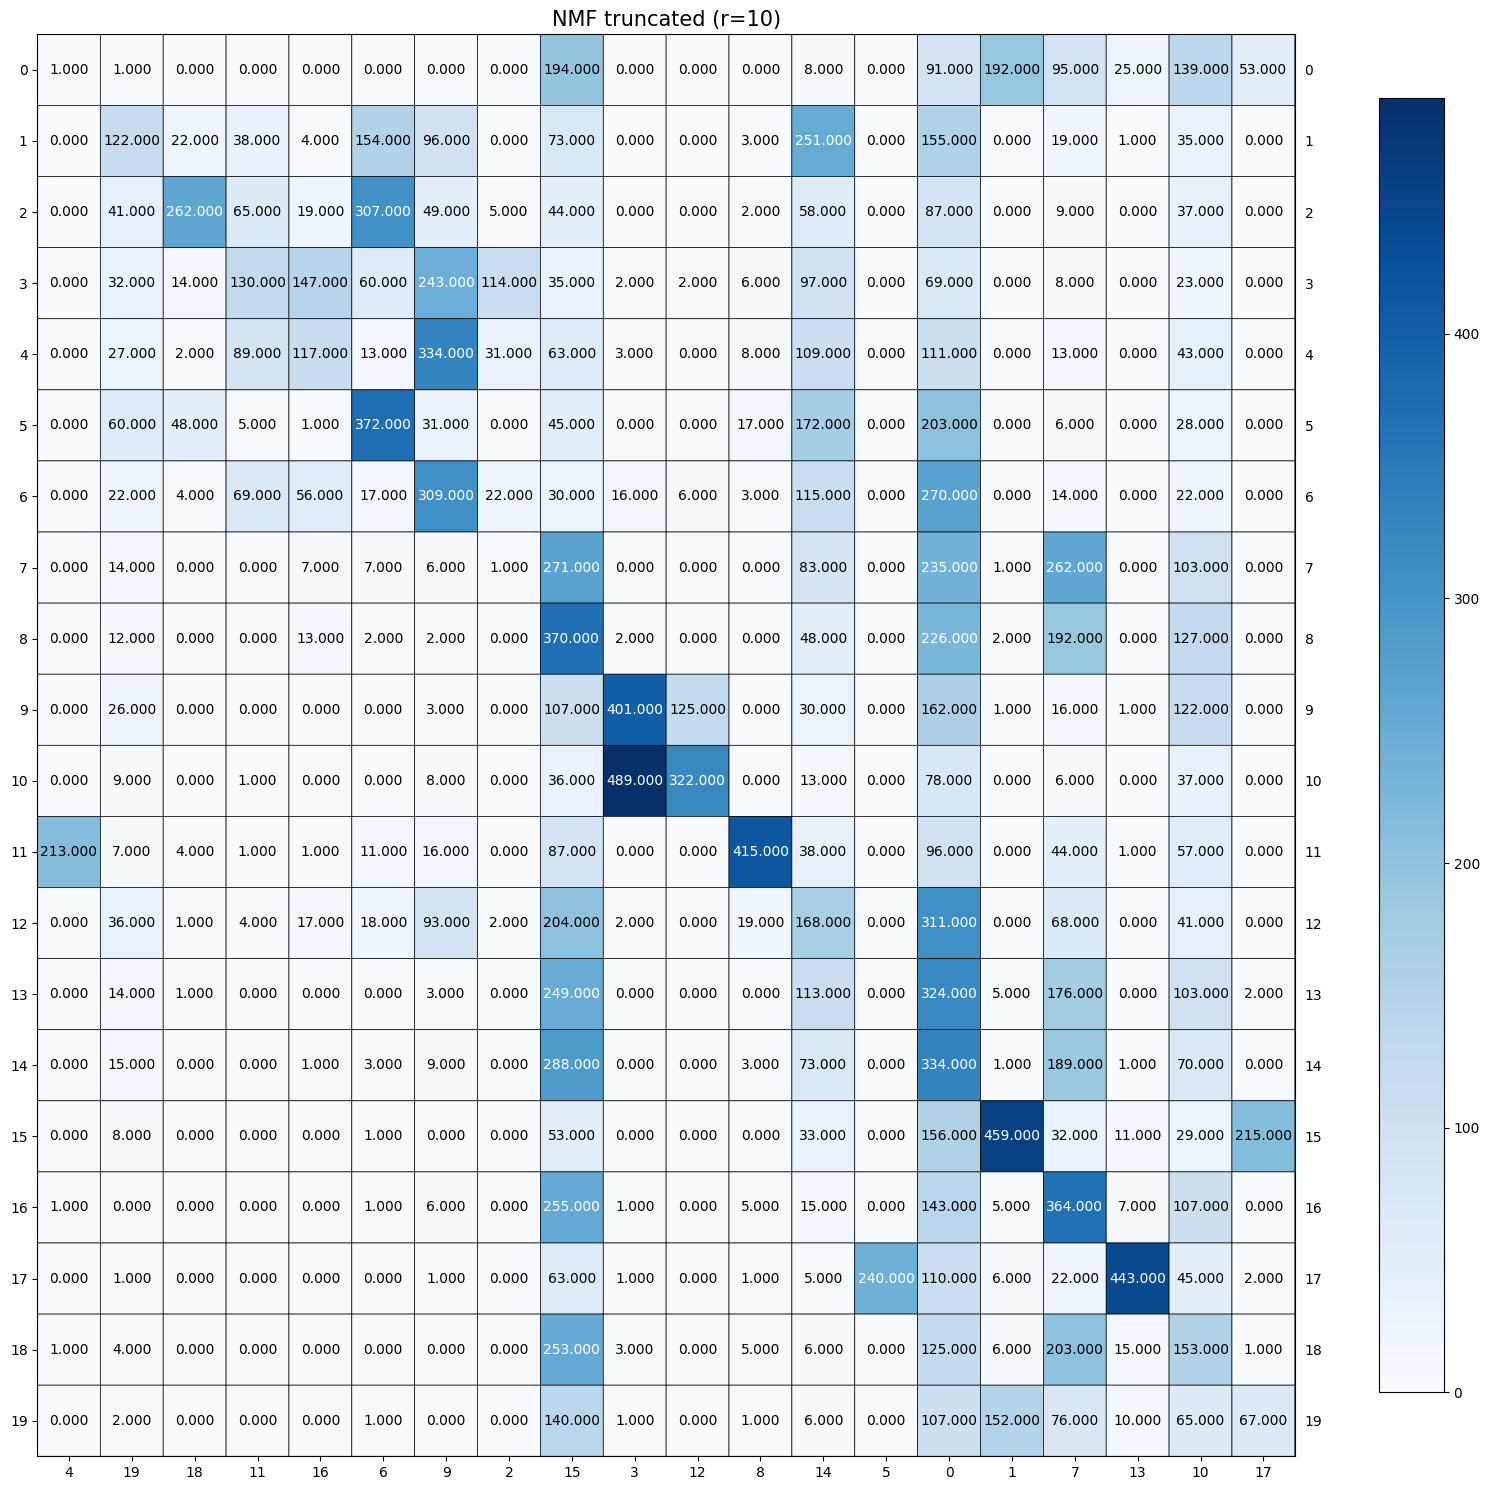

In [ ]:
km_20_nmf = KMeans(n_clusters=20, init='k-means++', max_iter=1000, n_init=30, random_state=42)
km_nmf_all_r__10 = km_20_nmf.fit(nmf_10_ac)
cm_nmf = confusion_matrix(dataset.target, km_nmf_all_r__10.labels_)
rows, cols = linear_sum_assignment(cm_nmf, maximize=True)
plot_mat(cm_nmf[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15),title = "NMF truncated (r=10)")

In [ ]:
print("############# NMF Truncated Scores #####################")
print("Homogeneity score :",
      homogeneity_score(dataset.target, km_nmf_all_r__10.labels_))
print("Completeness score score :",
      completeness_score(dataset.target, km_nmf_all_r__10.labels_))
print("V-measure score :",
      v_measure_score(dataset.target, km_nmf_all_r__10.labels_))
print("Adjusted Rand Index score is :",
      adjusted_rand_score(dataset.target, km_nmf_all_r__10.labels_))
print("Adjusted Mutual information score is:",
      adjusted_mutual_info_score(dataset.target, km_nmf_all_r__10.labels_))


############# NMF Truncated Scores #####################
Homogeneity score : 0.3013011867132605
Completeness score score : 0.33947726117776017
V-measure score : 0.31925200353312305
Adjusted Rand Index score is : 0.10294726949206563
Adjusted Mutual information score is: 0.316914981488837


# Answer-10

First, we chose best 'r' for SVD and NMF respectively, and now we run K-Means on them to obtain below contingency matrices as shown in the plots above. 5 metric scores for each SVM and NMF with best 'r' are shown below :



|                        | Homogeneity Score | Completeness Score | V-Measure Score | Adjusted Rand Index | Adjusted Mutual Information Score |
|------------------------|-------------------|--------------------|------------------|---------------------|-----------------------------------|
| **SVD Truncated Scores** | 0.323               | 0.352                    | 0.337                  | 0.127                        | 0.335                                      |
| **NMF Truncated Scores** | 0.301               | 0.339                    | 0.319                  | 0.103                        | 0.317                                      |


# UMAP

In [ ]:
h_s_euc = []
c_s_euc = []
v_s_euc = []
ar_s_euc = []
ami_s_euc = []
h_s_cos = []
c_s_cos = []
v_s_cos = []
ar_s_cos = []
ami_s_cos = []
ranks = [5,20,200]
km_20 = KMeans(n_clusters=20, init='k-means++', max_iter=1500, n_init=30, random_state=42)
for rank in ranks:
    print(' UMAP Euclidean  r = ', rank)
    umap_euc = umap.UMAP(n_components=rank, metric='euclidean').fit_transform(tfidf_20)
    kmean_euc = km_20.fit(umap_euc)
    h_s_euc.append(homogeneity_score(dataset.target, kmean_euc.labels_))
    c_s_euc.append(completeness_score(dataset.target, kmean_euc.labels_))
    v_s_euc.append(v_measure_score(dataset.target, kmean_euc.labels_))
    ar_s_euc.append(adjusted_rand_score(dataset.target, kmean_euc.labels_))
    ami_s_euc.append(adjusted_mutual_info_score(dataset.target, kmean_euc.labels_))

    print(' UMAP Cosine, r = ', rank)
    umap_cos = umap.UMAP(n_components=rank, metric='cosine').fit_transform(tfidf_20)
    kmean_cos = km_20.fit(umap_cos)
    h_s_cos.append(homogeneity_score(dataset.target, kmean_cos.labels_))
    c_s_euc.append(completeness_score(dataset.target, kmean_cos.labels_))
    v_s_euc.append(v_measure_score(dataset.target, kmean_cos.labels_))
    ar_s_euc.append(adjusted_rand_score(dataset.target, kmean_cos.labels_))
    ami_s_euc.append(adjusted_mutual_info_score(dataset.target, kmean_cos.labels_))


 UMAP Euclidean  r =  5
 UMAP Cosine, r =  5
 UMAP Euclidean  r =  20
 UMAP Cosine, r =  20
 UMAP Euclidean  r =  200
 UMAP Cosine, r =  200


In [ ]:
label = dataset.target

print("-----------------  UMAP (Euclidean)  -----------------\n")
for i in range(len(ranks)):
    print("\nRank={} ".format(ranks[i]))
    print("***********\n")
    print("Homogeneity score :", h_s_euc[i])
    print("Completeness score :", c_s_euc[2*i])
    print("V-measure score :", v_s_euc[2*i])
    print("Adjusted Rand Index score :", ar_s_euc[2*i])
    print("Adjusted Mutual information score :", ami_s_euc[2*i])

print("\n-----------------  UMAP (Cosine)  -----------------\n")
for i in range(len(ranks)):
    print("\nRank={}".format(ranks[i]))
    print("***********\n")
    print("Homogeneity score :", h_s_cos[i])
    print("Completeness score :", c_s_euc[2*i+1])
    print("V-measure score :", v_s_euc[2*i+1])
    print("Adjusted Rand Index score :", ar_s_euc[2*i+1])
    print("Adjusted Mutual information score :", ami_s_euc[2*i+1])



-----------------  UMAP (Euclidean)  -----------------


Rank=5 
***********

Homogeneity score : 0.006841303977673622
Completeness score : 0.007091416567500562
V-measure score : 0.006964115330280703
Adjusted Rand Index score : 0.0009578016720213048
Adjusted Mutual information score : 0.003706469184580692

Rank=20 
***********

Homogeneity score : 0.00759271224822598
Completeness score : 0.007730153593475889
V-measure score : 0.007660816517771405
Adjusted Rand Index score : 0.0009746129734326004
Adjusted Mutual information score : 0.004426438274208731

Rank=200 
***********

Homogeneity score : 0.006846613057672704
Completeness score : 0.007108161411607371
V-measure score : 0.006974936190318378
Adjusted Rand Index score : 0.0007528907812050753
Adjusted Mutual information score : 0.0037314028276295313

-----------------  UMAP (Cosine)  -----------------


Rank=5
***********

Homogeneity score : 0.5681500291547111
Completeness score : 0.5945985755438022
V-measure score : 0.58107349544943

Rank :  5


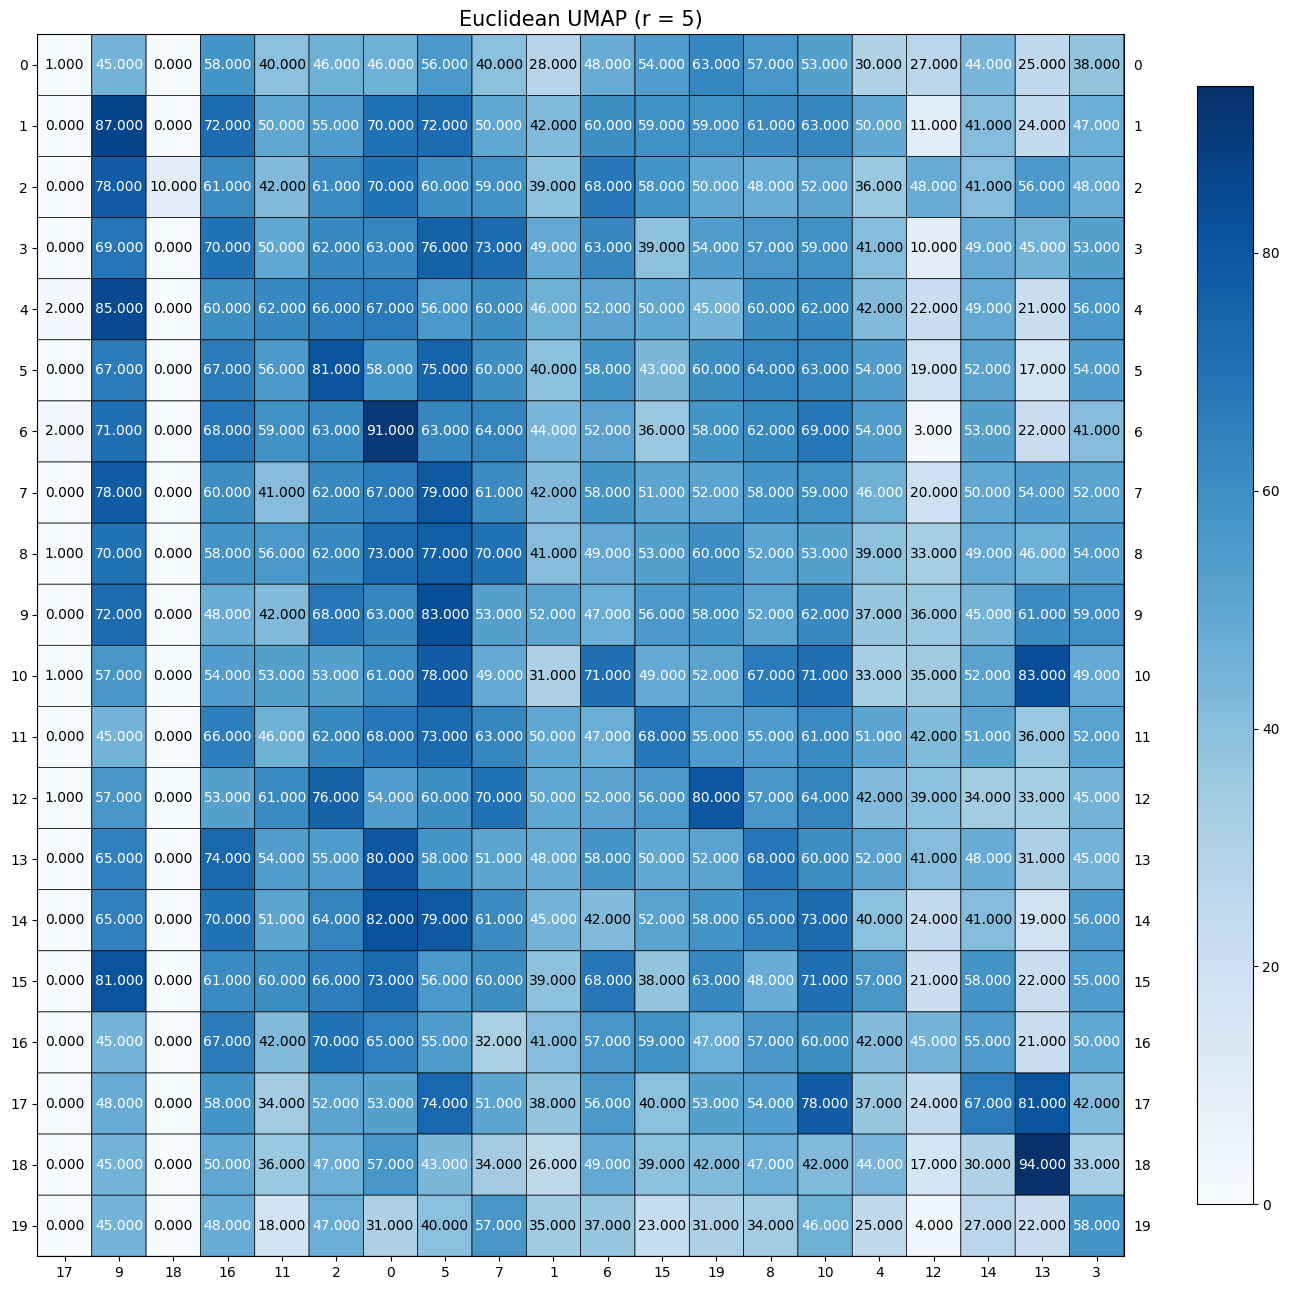

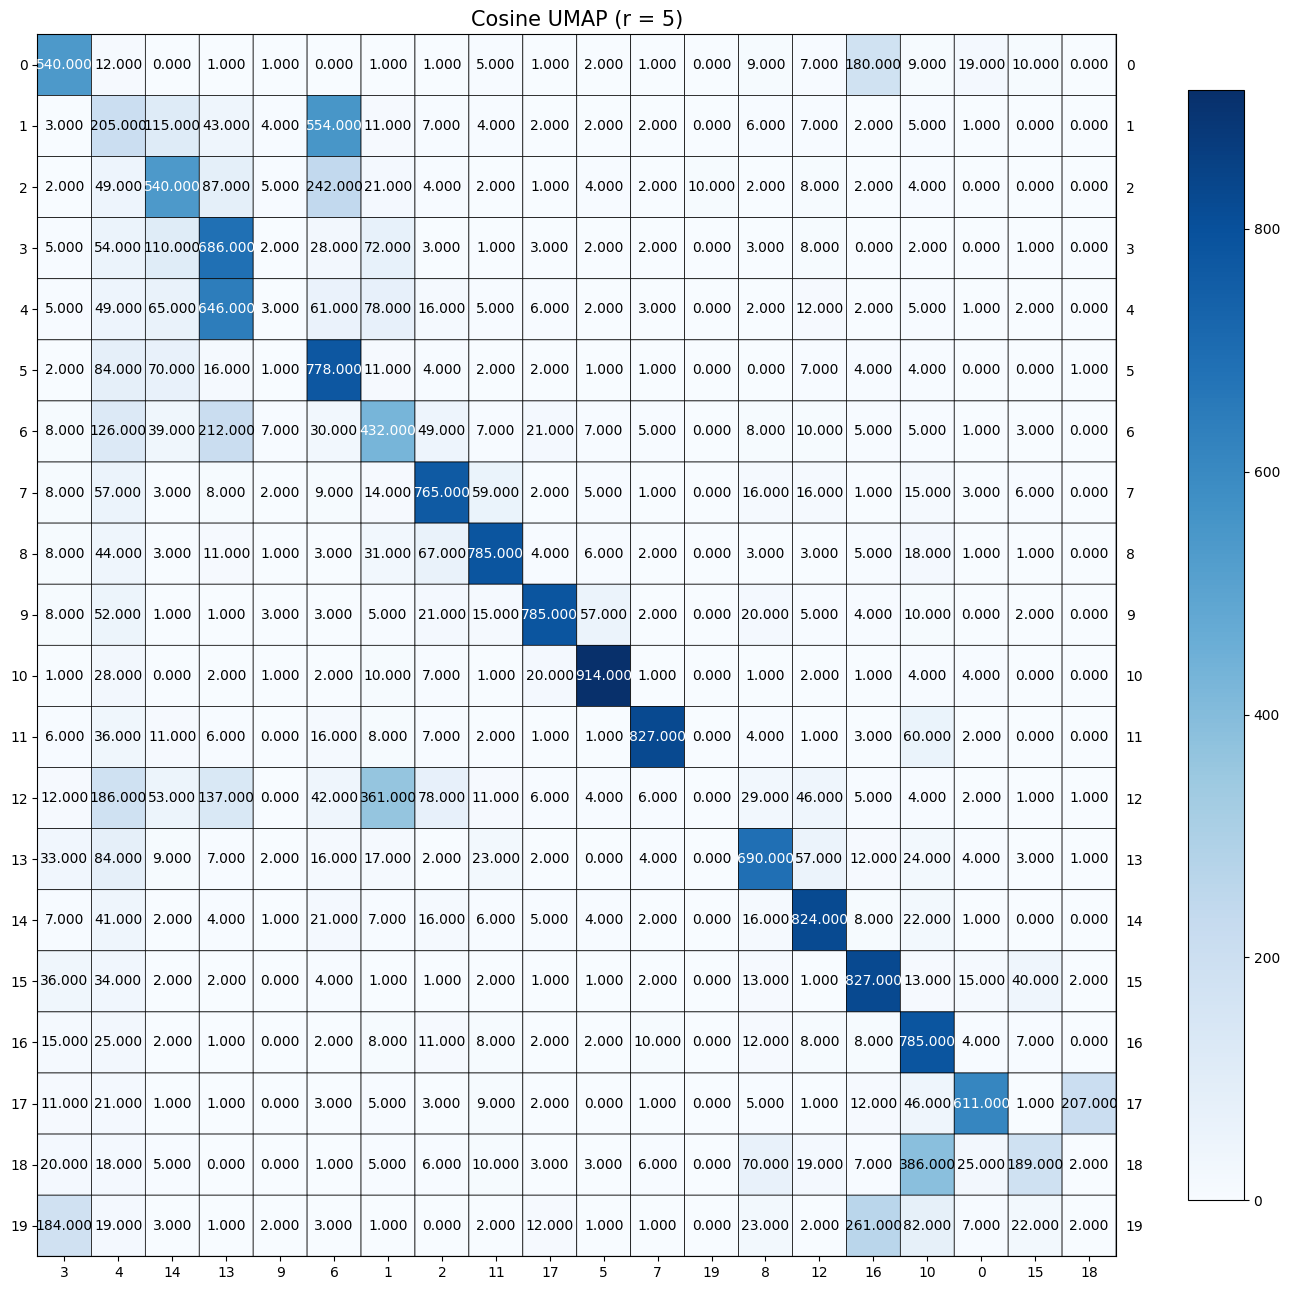

Rank :  20


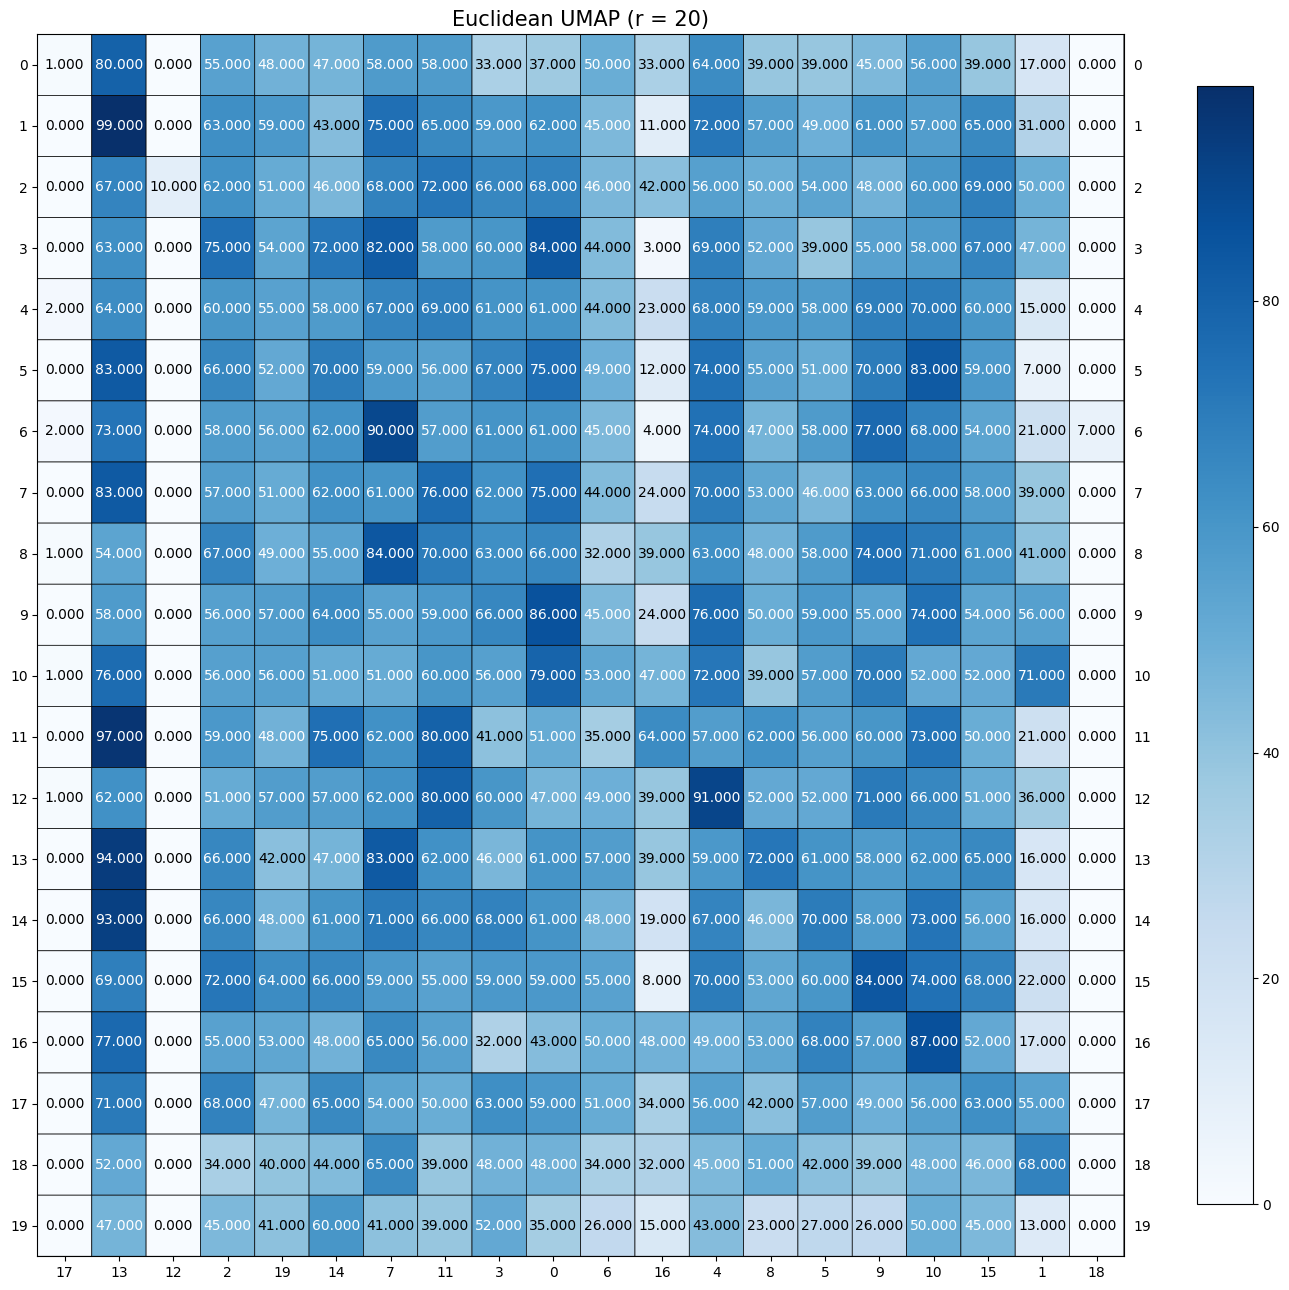

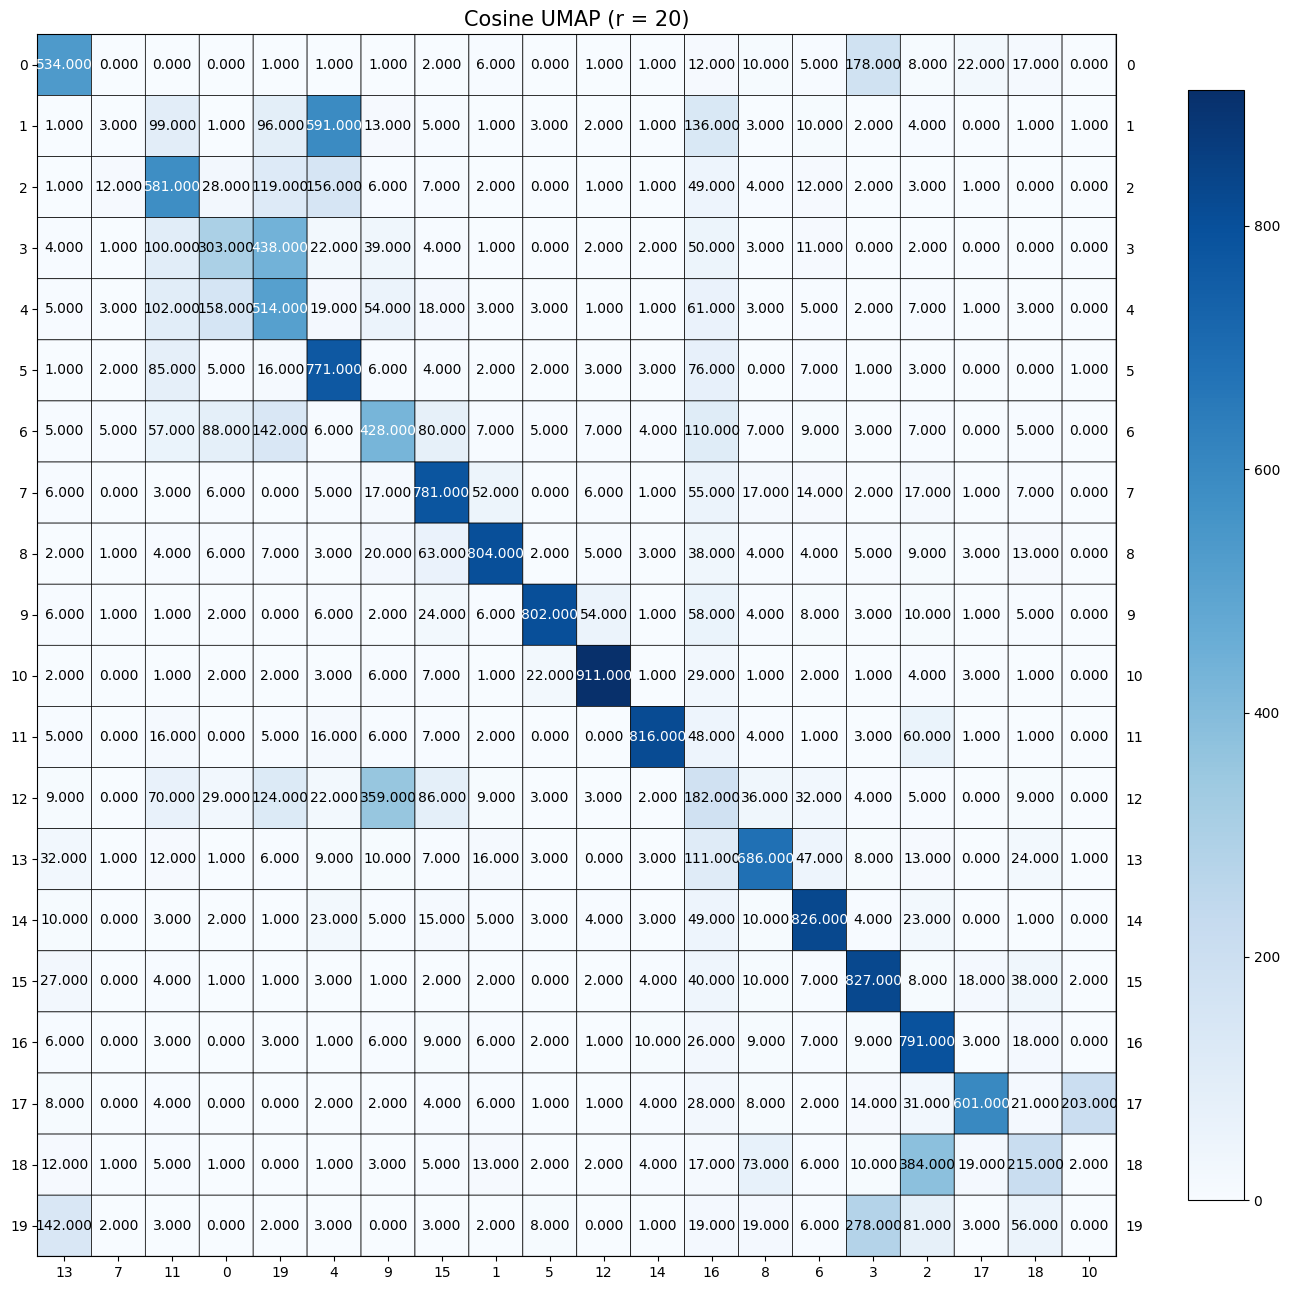

Rank :  200


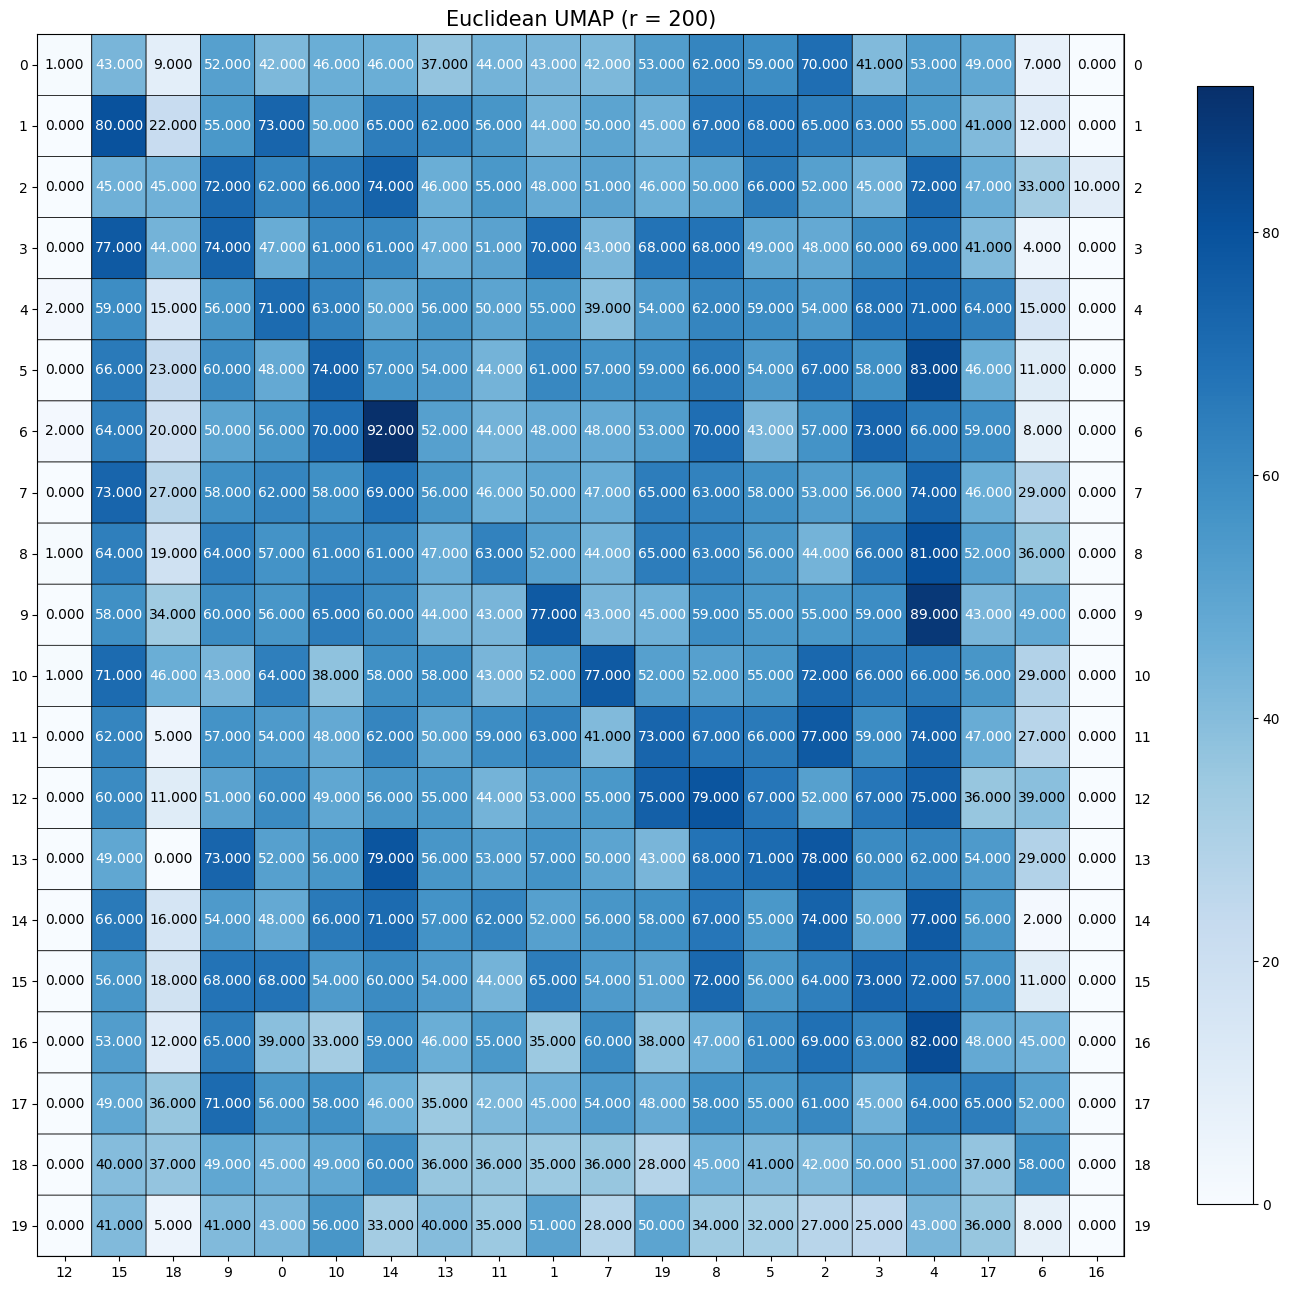

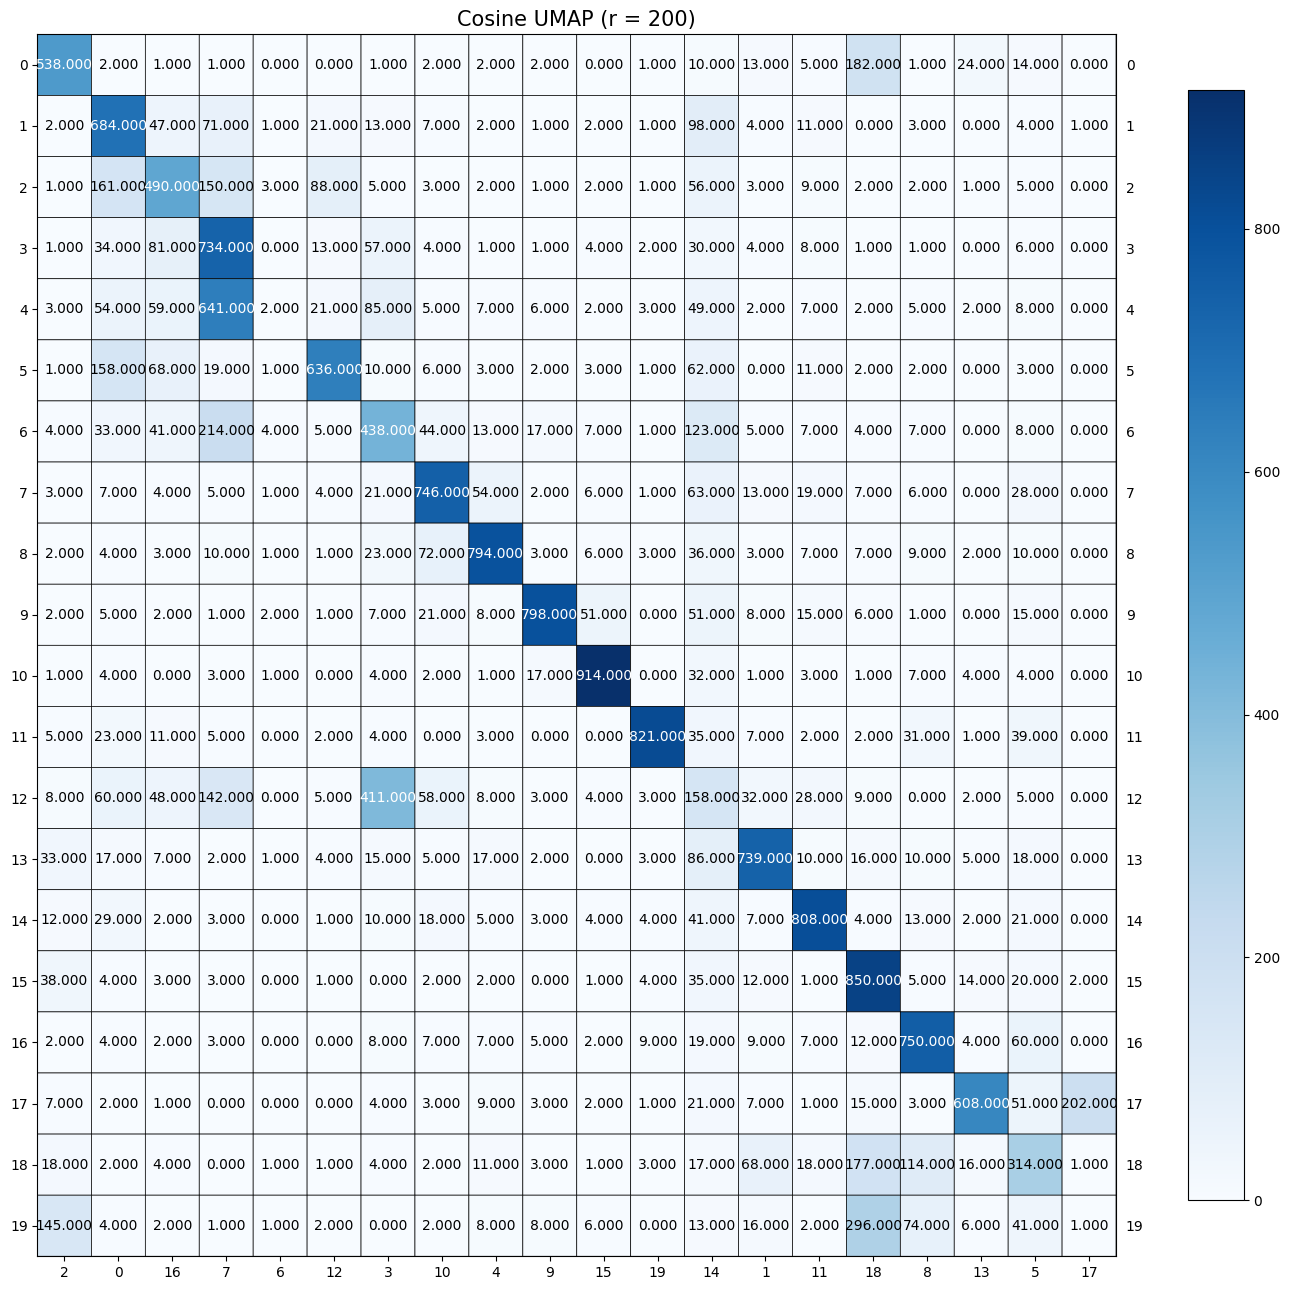

In [ ]:
ranks = [5,20,200]
km_20 = KMeans(n_clusters=20, init='k-means++', max_iter=1500, n_init=30, random_state=42)
label  = dataset.target
for rank in ranks:
    print("Rank : ", rank)
    umap_euc = umap.UMAP(n_components=rank, metric='euclidean').fit_transform(tfidf_20)
    kmean_euc = km_20.fit(umap_euc)
    cm = confusion_matrix(label, kmean_euc.labels_)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Euclidean UMAP (r = {})'.format(rank), size=(13,13))

    umap_cos = umap.UMAP(n_components=rank, metric='cosine').fit_transform(tfidf_20)
    kmean_cos = km_20.fit(umap_cos)
    cm = confusion_matrix(label, kmean_cos.labels_)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Cosine UMAP (r = {})'.format(rank), size=(13,13))



# ANSWER-11

Contingency matrices are given as above. Metric scores for different ranks and U-Map are given below

| Metric                           | Rank=5              | Rank=20             | Rank=200            |
|----------------------------------|---------------------|---------------------|---------------------|
| **UMAP (Euclidean)**             |                     |                     |                     |
| Homogeneity Score                | 0.007               | 0.008               | 0.007               |
| Completeness Score               | 0.007               | 0.008               | 0.007               |
| V-measure Score                  | 0.007               | 0.008               | 0.007               |
| Adjusted Rand Index Score        | 0.001               | 0.001               | 0.001               |
| Adjusted Mutual Information Score| 0.004               | 0.004               | 0.004               |
|----------------------------------|---------------------|---------------------|---------------------|
| **UMAP (Cosine)**                |                     |                     |                     |
| Homogeneity Score                | 0.568               | 0.566               | 0.566               |
| Completeness Score               | 0.595               | 0.592               | 0.592               |
| V-measure Score                  | 0.581               | 0.579               | 0.578               |
| Adjusted Rand Index Score        | 0.443               | 0.447               | 0.440               |
| Adjusted Mutual Information Score| 0.580               | 0.577               | 0.577               |


# ANSWER-12


We observe the best rank in the averaging of all metrics for rank = 5 and metric = 'cosine'. We note that the contingency matrices are very bad for 'euclidean'. Contrastive to euclidean, cosine contingency matrices are much better with more diagonal elemnts. This is owing to the curse of dimensionality, where points become more uniformly distributed in high-dimensional spaces, and the Euclidean distance may lose its discriminatory power.
Cosine metric tends to perform better than Euclidean distance in high-dimensional spaces because it is less affected by the curse of dimensionality and focuses on the angular relationships between vectors rather than their magnitudes.


# ANSWER-13

All results here are mentioned below. We clearly see that choosing UMAP ('Cosine') gives best results when we consider the average of all 5 metrics as the decider.

|                        | Homogeneity Score | Completeness Score | V-Measure Score | Adjusted Rand Index | Adjusted Mutual Information Score |
|------------------------|-------------------|--------------------|------------------|---------------------|-----------------------------------|
| **SVD Truncated Scores** | 0.323               | 0.352                    | 0.337                  | 0.127                        | 0.335                                      |
| **NMF Truncated Scores** | 0.301               | 0.339                    | 0.319                  | 0.103                        | 0.317                                      |





| Metric                           | Rank=5              | Rank=20             | Rank=200            |
|----------------------------------|---------------------|---------------------|---------------------|
| **UMAP (Euclidean)**             |                     |                     |                     |
| Homogeneity Score                | 0.007               | 0.008               | 0.007               |
| Completeness Score               | 0.007               | 0.008               | 0.007               |
| V-measure Score                  | 0.007               | 0.008               | 0.007               |
| Adjusted Rand Index Score        | 0.001               | 0.001               | 0.001               |
| Adjusted Mutual Information Score| 0.004               | 0.004               | 0.004               |
|----------------------------------|---------------------|---------------------|---------------------|
| **UMAP (Cosine)**                |                     |                     |                     |
| Homogeneity Score                | 0.568               | 0.566               | 0.566               |
| Completeness Score               | 0.595               | 0.592               | 0.592               |
| V-measure Score                  | 0.581               | 0.579               | 0.578               |
| Adjusted Rand Index Score        | 0.443               | 0.447               | 0.440               |
| Adjusted Mutual Information Score| 0.580               | 0.577               | 0.577               |



# Agglomerative clustering

In [ ]:
# r =5 umap cosine
best_r = 5
best_umap_cos = umap.UMAP(n_components=best_r, metric='cosine').fit_transform(tfidf_20)

In [ ]:
agg_c_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(best_umap_cos)
agg_c_single = AgglomerativeClustering(n_clusters=20, linkage='single').fit(best_umap_cos)
print("Homogeneity (Agglomerative Clustering-Ward): %0.3f" % homogeneity_score(dataset.target, agg_c_ward.labels_))
print("Completeness (Agglomerative Clustering- Ward): %0.3f" % completeness_score(dataset.target, agg_c_ward.labels_))
print("V-measure (Agglomerative Clustering- Ward): %0.3f" % v_measure_score(dataset.target, agg_c_ward.labels_))
print("Adjusted Rand-Index (Agglomerative Clustering- Ward): %.3f"% adjusted_rand_score(dataset.target, agg_c_ward.labels_))
print("Adjusted Mutual Information Score (Agglomerative Clustering- Ward): %.3f"% adjusted_mutual_info_score(dataset.target, agg_c_ward.labels_))
print("Homogeneity (Agglomerative Clustering-Single): %0.3f" % homogeneity_score(dataset.target, agg_c_single.labels_))
print("Completeness (Agglomerative Clustering-Single): %0.3f" % completeness_score(dataset.target, agg_c_single.labels_))
print("V-measure (Agglomerative Clustering-Single): %0.3f" % v_measure_score(dataset.target, agg_c_single.labels_))
print("Adjusted Rand-Index (Agglomerative Clustering-Single): %.3f"% adjusted_rand_score(dataset.target, agg_c_single.labels_))
print("Adjusted Mutual Information Score (Agglomerative Clustering-Single): %.3f"% adjusted_mutual_info_score(dataset.target, agg_c_single.labels_))


Homogeneity (Agglomerative Clustering-Ward): 0.547
Completeness (Agglomerative Clustering- Ward): 0.582
V-measure (Agglomerative Clustering- Ward): 0.564
Adjusted Rand-Index (Agglomerative Clustering- Ward): 0.421
Adjusted Mutual Information Score (Agglomerative Clustering- Ward): 0.563

Homogeneity (Agglomerative Clustering-Single): 0.016
Completeness (Agglomerative Clustering-Single): 0.365
V-measure (Agglomerative Clustering-Single): 0.030
Adjusted Rand-Index (Agglomerative Clustering-Single): 0.000
Adjusted Mutual Information Score (Agglomerative Clustering-Single): 0.025


# Answer 14

| Metric                                          | Agglomerative Clustering (Ward) | Agglomerative Clustering (Single) |
|-------------------------------------------------|-----------------------------------|-------------------------------------|
| Homogeneity Score                                | 0.547                             | 0.016                               |
| Completeness Score                               | 0.582                             | 0.365                               |
| V-Measure Score                                  | 0.564                             | 0.030                               |
| Adjusted Rand Index Score                        | 0.421                             | 0.000                               |
| Adjusted Mutual Information Score               | 0.563                             | 0.025                               |


# HDBSCAN

In [ ]:
cluster_sizes_rec = []
min_samples_rec = []
hdb_hs = []
hdb_cs = []
hdb_vs = []
hdb_ars = []
hdb_amis = []


cluster_sizes = [20,100,200]
min_samples = [5,25,50,100,200,500,1000,3000]

for i in range(len(cluster_sizes)):
    for j in range(len(min_samples)):
        print('Hyperparameter search for cluster_size = {} & min_sample = {} '.format(cluster_sizes[i],min_samples[j]))
        hdbs = hdbscan.HDBSCAN(min_cluster_size=cluster_sizes[i], min_samples=min_samples[j]).fit_predict(best_umap_cos)
        hdb_hs.append(homogeneity_score(dataset.target, hdbs))
        hdb_cs.append(completeness_score(dataset.target, hdbs))
        hdb_vs.append(v_measure_score(dataset.target, hdbs))
        hdb_ars.append(adjusted_rand_score(dataset.target, hdbs))
        hdb_amis.append(adjusted_mutual_info_score(dataset.target, hdbs))
        cluster_sizes_rec.append(cluster_sizes[i])
        min_samples_rec.append(min_samples[j])
print('Done testing')


Hyperparameter search for cluster_size = 20 & min_sample = 5 
Hyperparameter search for cluster_size = 20 & min_sample = 25 
Hyperparameter search for cluster_size = 20 & min_sample = 50 
Hyperparameter search for cluster_size = 20 & min_sample = 100 
Hyperparameter search for cluster_size = 20 & min_sample = 200 
Hyperparameter search for cluster_size = 20 & min_sample = 500 
Hyperparameter search for cluster_size = 20 & min_sample = 1000 
Hyperparameter search for cluster_size = 20 & min_sample = 3000 
Hyperparameter search for cluster_size = 100 & min_sample = 5 
Hyperparameter search for cluster_size = 100 & min_sample = 25 
Hyperparameter search for cluster_size = 100 & min_sample = 50 
Hyperparameter search for cluster_size = 100 & min_sample = 100 
Hyperparameter search for cluster_size = 100 & min_sample = 200 
Hyperparameter search for cluster_size = 100 & min_sample = 500 
Hyperparameter search for cluster_size = 100 & min_sample = 1000 
Hyperparameter search for cluster_size

In [ ]:
average_metrics = [y/5 for y in [sum(x) for x in zip(hdb_hs, hdb_cs, hdb_vs, hdb_ars, hdb_amis)]]

best_cluster_size_hdb = cluster_sizes_rec[average_metrics.index(max(average_metrics))]
best_min_samples_hdb = min_samples_rec[average_metrics.index(max(average_metrics))]

print('Best Cluster size = {}, Best Minimum number of samples (HDBSCAN) = {}'.format(best_cluster_size_hdb, best_min_samples_hdb))
print('Average value of 5 metrics:', max(average_metrics))

print('\n------------ Best metrics ------------\n')
print('Homogeneity :', round(hdb_hs[average_metrics.index(max(average_metrics))],3))
print('Completeness :', round(hdb_cs[average_metrics.index(max(average_metrics))],3))
print('V-measure :', round(hdb_vs[average_metrics.index(max(average_metrics))],3))
print('Adjusted Rand-Index :', round(hdb_ars[average_metrics.index(max(average_metrics))],3))
print('Adjusted Mutual Information Score :', round(hdb_amis[average_metrics.index(max(average_metrics))],3))


Best Cluster size = 200, Best Minimum number of samples (HDBSCAN) = 25
Average value of 5 metrics: 0.4579520632745163

------------ Best metrics ------------

Homogeneity : 0.428
Completeness : 0.624
V-measure : 0.508
Adjusted Rand-Index : 0.223
Adjusted Mutual Information Score : 0.507


# ANSWER-15

The best hyperparameters for HDBSCAN clustering were found to be a cluster size = 200 and min_samples = 25. The average value of five clustering metrics = 0.4579.

**Best Metrics:**

| Metric                          | Value  |
|---------------------------------|--------|
| Homogeneity                     | 0.428  |
| Completeness                    | 0.624  |
| V-measure                       | 0.508  |
| Adjusted Rand-Index             | 0.223  |
| Adjusted Mutual Information     | 0.507  |


# ANSWER-16

The contingence matrix for best hyperparameters (in our case cluster size = 200 and min_samples = 25) is plotted below

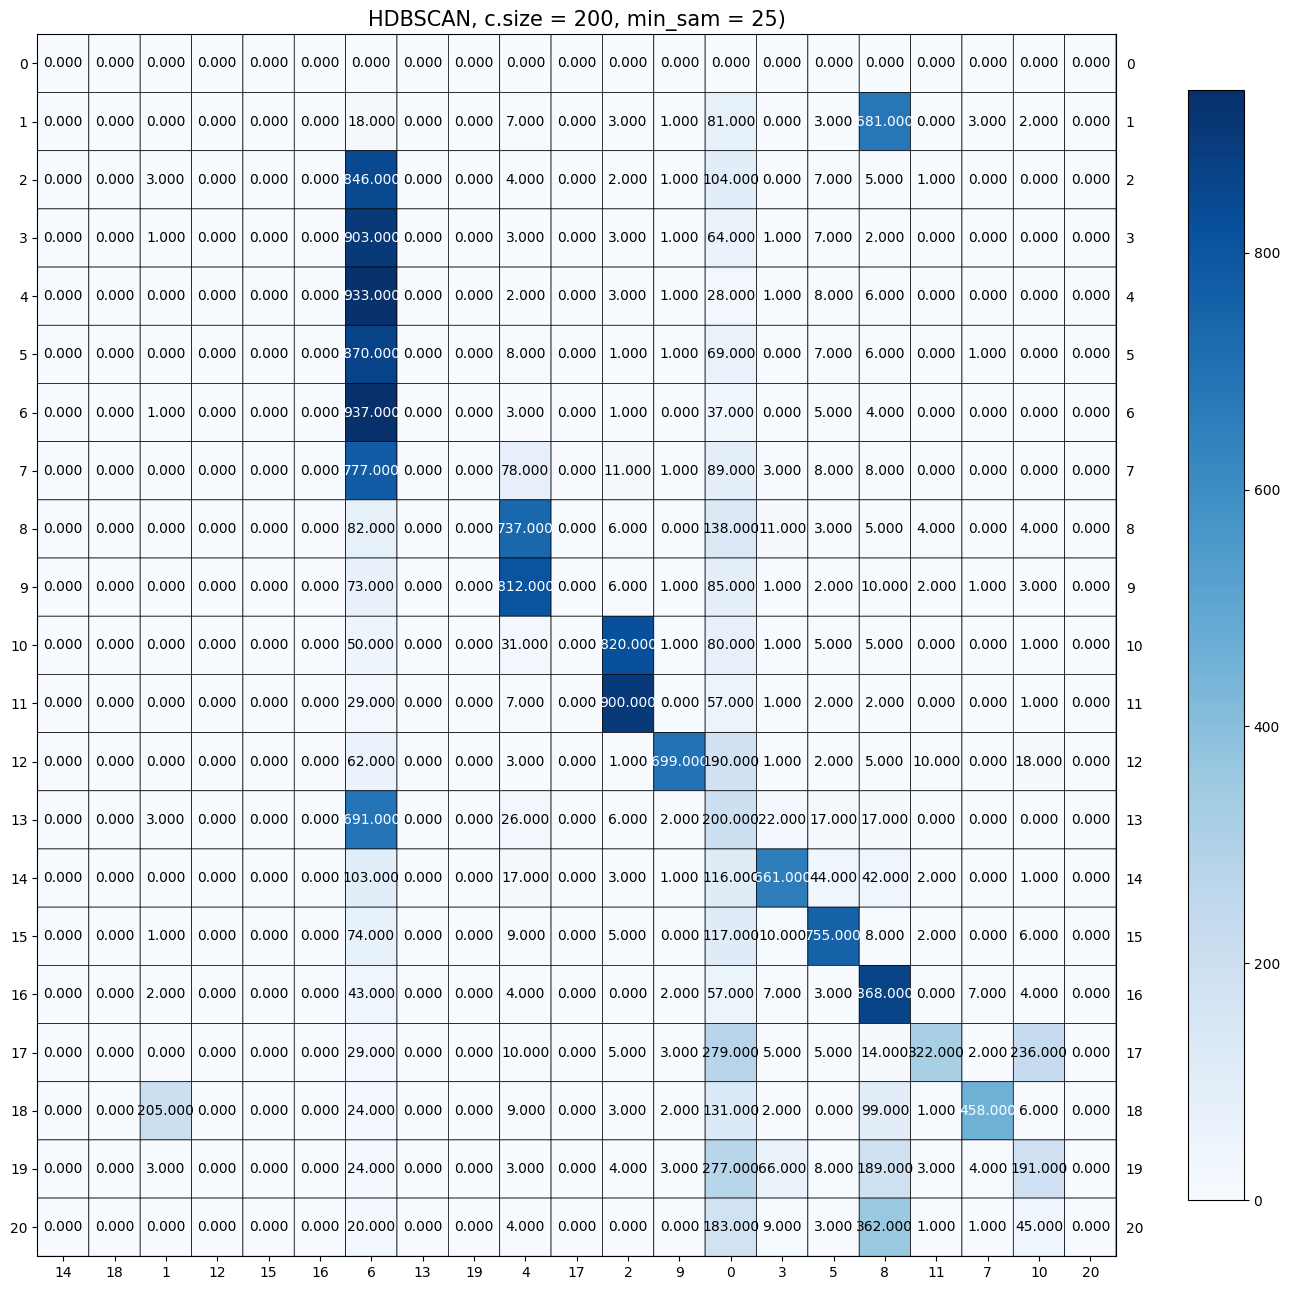

In [ ]:
hdbs = hdbscan.HDBSCAN(min_cluster_size=best_cluster_size_hdb,min_samples=best_min_samples_hdb).fit_predict(best_umap_cos)
cm = confusion_matrix(dataset.target, hdbs)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'HDBSCAN, c.size = 200, min_sam = 25)', size=(13,13))


# ANSWER-16

We note from the contingency matrix above that HDBSCAN has produced a total of around 10 major clusters. Many ground truth clusters that were initially missing have been merged into other clusters because the clustering is organized as a tree structure rather than a flat one.

The label "-1" in the clustering results denotes outliers or samples that haven't been assigned to any specific cluster by the algorithms. The merging of clusters is likely attributed to excessive smoothing, influenced by hyperparameters' sensitivity, while the minimum cluster size remains unchanged. This has led to the loss of low-density clusters. Additionally, both algorithms struggle to identify clusters that exhibit significant variation or are sparse in high-dimensional spaces, a scenario common in textual data.

# Best dim-reduction and clustering algorithm

In [5]:
def custom_scorer(y_true, labels):
    """
    Custom scoring function that combines multiple clustering metrics.

    Parameters:
    - y_true: True labels (ground truth).
    - labels: Predicted labels from the clustering algorithm.

    Returns:
    - Average of homogeneity score, completeness score, V-measure score, adjusted Rand index score,
      and adjusted mutual information score.
    """
    homogeneity = homogeneity_score(y_true, labels)
    completeness = completeness_score(y_true, labels)
    v_measure = v_measure_score(y_true, labels)
    adjusted_rand = adjusted_rand_score(y_true, labels)
    adjusted_mutual_info = adjusted_mutual_info_score(y_true, labels)

    # Calculate the average of the scores
    average_score = (homogeneity + completeness + v_measure + adjusted_rand + adjusted_mutual_info) / 5.0

    return average_score


In [ ]:
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.pipeline import Pipeline

dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 42,remove=('headers','footers'))
dvec_20 = CountVectorizer(stop_words='english',min_df=3)
tfidf_20 = TfidfTransformer()
data_dvec_20 = dvec_20.fit_transform(dataset.data)
tfidf_20 = tfidf_20.fit_transform(data_dvec_20)
y_true = dataset.target

# Define hyperparameter combinations for dimensionality reduction
dimensionality_reduction_methods = {'UMAP': umap.UMAP,'SVD': TruncatedSVD, 'NMF': NMF}
dimensionality_reduction_params = {'UMAP': [5, 20, 200],'SVD': [5, 20, 200], 'NMF': [5, 20, 200]}

# Define hyperparameter combinations for clustering
clustering_methods = {'Agglomerative': AgglomerativeClustering,'KMeans': KMeans, 'HDBSCAN': hdbscan.HDBSCAN}
clustering_params = {'Agglomerative': [20],'KMeans': [10, 20, 50], 'HDBSCAN': [100, 200]}

best_score = float('-inf')
best_params = {}
# Iterate through hyperparameter combinations
for dim_reduction_method, dim_reduction_param_list in dimensionality_reduction_params.items():
    for clustering_method, clustering_param_list in clustering_params.items():
        i=1
        print("---> Running {} with {}  .......................... ".format(dim_reduction_method,clustering_method))
        for dim_reduction_param in dim_reduction_param_list:
            for clustering_param in clustering_param_list:
                print("Run # : ", i); i+=1

                # Apply dimensionality reduction

                if dim_reduction_method == 'UMAP':
                  dim_reduction_model = umap.UMAP(n_components=dim_reduction_param, metric='cosine')
                else:
                  dim_reduction_model = dimensionality_reduction_methods[dim_reduction_method](n_components=dim_reduction_param)

                features = dim_reduction_model.fit_transform(tfidf_20)


                if clustering_method == 'HDBSCAN':
                    clustering_model = hdbscan.HDBSCAN(min_cluster_size=clustering_param, min_samples=30)
                elif clustering_method == 'Agglomerative':
                    clustering_model = AgglomerativeClustering(n_clusters=clustering_param, linkage='ward')
                else:
                    clustering_model = clustering_methods[clustering_method](n_clusters=clustering_param)

                labels = clustering_model.fit_predict(features)

                # Calculate custom score
                custom_score = custom_scorer(y_true, labels)

                # Update best parameters if the current combination is better
                if custom_score > best_score:
                    best_score = custom_score
                    best_params = {
                        'dim_reduction_method': dim_reduction_method,
                        'dim_reduction_param': dim_reduction_param,
                        'clustering_method': clustering_method,
                        'clustering_param': clustering_param
                    }

# Print the best parameters and corresponding score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


---> Running UMAP with Agglomerative  .......................... 
Run # :  1
Run # :  2
Run # :  3
---> Running UMAP with KMeans  .......................... 
Run # :  1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---> Running UMAP with HDBSCAN  .......................... 
Run # :  1
Run # :  2
Run # :  3
Run # :  4
Run # :  5
Run # :  6
---> Running SVD with Agglomerative  .......................... 
Run # :  1
Run # :  2
Run # :  3
---> Running SVD with KMeans  .......................... 
Run # :  1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---> Running SVD with HDBSCAN  .......................... 
Run # :  1
Run # :  2
Run # :  3
Run # :  4
Run # :  5
Run # :  6
---> Running NMF with Agglomerative  .......................... 
Run # :  1
Run # :  2
Run # :  3
---> Running NMF with KMeans  .......................... 
Run # :  1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  7


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run # :  9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---> Running NMF with HDBSCAN  .......................... 
Run # :  1
Run # :  2
Run # :  3
Run # :  4
Run # :  5
Run # :  6


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Best Parameters: {'dim_reduction_method': 'UMAP', 'dim_reduction_param': 20, 'clustering_method': 'KMeans', 'clustering_param': 20}
Best Score: 0.5565803679648941


In [ ]:
best_params

print("------------------- BEST DIM_RED + CLUSTERING ------------------- \n")

print("Best dimension reduction : " , best_params['dim_reduction_method'], "   |  Rank = ", best_params['dim_reduction_param'])
print("Best clustering          : ", best_params['clustering_method'], " |  Number of clusters = ", best_params['clustering_param'])
print("-----------------------------------------------------------------")

------------------- BEST DIM_RED + CLUSTERING ------------------- 

Best dimension reduction :  UMAP    |  Rank =  20
Best clustering          :  KMeans  |  Number of clusters =  20
-----------------------------------------------------------------


#ANSWER-17

For this question, I used a custom scorer that takes the average of the 5 scores and hence finds the best combination.
The best combination found is as in the above table of the code cell output.

 **Best Dimension Reduction:**
- Technique: UMAP
- Rank: 20

**Best Clustering:**
- Method: KMeans
- Number of Clusters: 20

**Best Score**

Custom score  = 0.557

----

We note that UMap and KMeans go hand-in-hand. UMAP being a  Non-linear Dimension Reduction technique is effective for non-linear dimension reduction, preserving both local and global structure in the data, and can capture complex relationships in high-dimensional data, making it suitable for our dataset. UMAP tends to preserve the inherent cluster structures in the data, making it useful for applications where identifying natural groupings or clusters is important, and thereon KMeans finds the best cluster centroids.



# ANSWER-18

I tried k-means++ as initializer and tried standardizing data, but it gave results that are either equal or subpar to the above best case custom_score= 0.557.